In [2]:
import numpy as np
import gym
from gym import spaces
import matplotlib.pyplot as plt
import operator
from IPython.display import clear_output
from time import sleep
import random
import itertools
import tqdm

tqdm.monitor_interval = 0

In [3]:
env = gym.make('MountainCar-v0') # Make environemnt

C:\Users\yasse\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\yasse\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

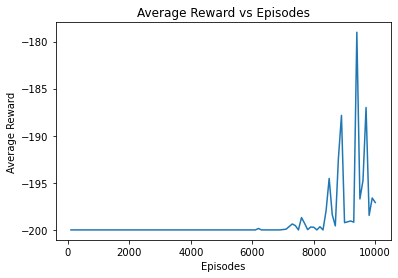

In [17]:

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps)/episodes
    
    # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        env.reset()
        state = np.array([random.uniform(-0.6,-0.4),0.0]) 
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 50])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 50])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + 
                                 discount*np.max(Q[state2_adj[0], 
                                                   state2_adj[1]]) - 
                                 Q[state_adj[0], state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
            
    env.close()
    
    return ave_reward_list

# Run Q-learning algorithm
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 10000)

# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.show()   


In [15]:
print(np.array([random.uniform(-0.6,-0.4),0]))

[-0.44663519  0.        ]


In [41]:
def create_random_policy(env):
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    policy = np.random.uniform(low = -1, high = 1, 
                          size = (num_states[0], num_states[1], 
                                  env.action_space.n))
    return policy

In [10]:
def create_random_policy(env):
    num_states = (env.observation_space.high - env.observation_space.low)*\
                    np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    policy = {}
    for key in range(0, num_states[0]*num_states[1]): 
        p = {}
        for action in range(0, env.action_space.n):
            p[action] = 1 / env.action_space.n
            policy[key] = p
    return policy

In [5]:
def create_state_action_dictionary(env, policy):
    Q = {}
    for key in policy.keys():
         Q[key] = {a: 0.0 for a in range(0, env.action_space.n)}
    return Q

In [16]:
def run_game(env, policy, display=True):
    env.reset()
    episode = []
    finished = False

    while not finished:
        s = env.env.s
        if display:
            clear_output(True)
            env.render()
            sleep(1)

        timestep = []
        timestep.append(s)
        n = random.uniform(0, sum(policy[s].values()))
        top_range = 0
        for prob in policy[s].items():
            top_range += prob[1]
            if n < top_range:
                action = prob[0]
                break 
        state, reward, finished, info = env.step(action)
        timestep.append(action)
        timestep.append(reward)

        episode.append(timestep)

    if display:
        clear_output(True)
        env.render()
        sleep(1)
    return episode

In [7]:
def test_policy(policy, env):
    wins = 0
    r = 100
    for i in range(r):
        w = run_game(env, policy, display=False)[-1][-1]
        if w == 1:
              wins += 1
    return wins / r

In [17]:
def monte_carlo_e_soft(env, episodes=100, policy=None, epsilon=0.01):
    if not policy:
        policy = create_random_policy(env)  # Create an empty dictionary to store state action values    
    Q = create_state_action_dictionary(env, policy) # Empty dictionary for storing rewards for each state-action pair
    returns = {} # 3.
    
    for _ in range(episodes): # Looping through episodes
        G = 0 # Store cumulative reward in G (initialized at 0)
        episode = run_game(env=env, policy=policy, display=False) # Store state, action and value respectively 
        
        # for loop through reversed indices of episode array. 
        # The logic behind it being reversed is that the eventual reward would be at the end. 
        # So we have to go back from the last timestep to the first one propagating result from the future.
        
        for i in reversed(range(0, len(episode))):   
            s_t, a_t, r_t = episode[i] 
            state_action = (s_t, a_t)
            G += r_t # Increment total reward by reward on current timestep
            
            if not state_action in [(x[0], x[1]) for x in episode[0:i]]: # 
                if returns.get(state_action):
                    returns[state_action].append(G)
                else:
                    returns[state_action] = [G]   
                    
                Q[s_t][a_t] = sum(returns[state_action]) / len(returns[state_action]) # Average reward across episodes
                
                Q_list = list(map(lambda x: x[1], Q[s_t].items())) # Finding the action with maximum value
                indices = [i for i, x in enumerate(Q_list) if x == max(Q_list)]
                max_Q = random.choice(indices)
                
                A_star = max_Q # 14.
                
                for a in policy[s_t].items(): # Update action probability for s_t in policy
                    if a[0] == A_star:
                        policy[s_t][a[0]] = 1 - epsilon + (epsilon / abs(sum(policy[s_t].values())))
                    else:
                        policy[s_t][a[0]] = (epsilon / abs(sum(policy[s_t].values())))

    return policy

In [18]:
monte_carlo_e_soft(env, episodes=100, policy=None, epsilon=0.01)

NameError: name 's' is not defined

In [30]:
env.action_space.n

3

Episode:0 avg:-200.0 min:-200.0 max:-200.0
Episode:500 avg:-200.0 min:-200.0 max:-200.0
Episode:1000 avg:-200.0 min:-200.0 max:-200.0
Episode:1500 avg:-199.836 min:-200.0 max:-165.0
Episode:2000 avg:-199.7 min:-200.0 max:-164.0
Episode:2500 avg:-198.552 min:-200.0 max:-152.0
Episode:3000 avg:-198.126 min:-200.0 max:-134.0
Episode:3500 avg:-196.734 min:-200.0 max:-147.0
Episode:4000 avg:-197.644 min:-200.0 max:-144.0
Episode:4500 avg:-196.288 min:-200.0 max:-149.0
Episode:5000 avg:-194.52 min:-200.0 max:-127.0
Episode:5500 avg:-188.018 min:-200.0 max:-142.0
Episode:6000 avg:-184.444 min:-200.0 max:-118.0
Episode:6500 avg:-180.832 min:-200.0 max:-111.0
Episode:7000 avg:-172.372 min:-200.0 max:-118.0
Episode:7500 avg:-157.772 min:-200.0 max:-114.0
Episode:8000 avg:-144.408 min:-200.0 max:-107.0
Episode:8500 avg:-145.364 min:-178.0 max:-107.0
Episode:9000 avg:-152.85 min:-200.0 max:-99.0
Episode:9500 avg:-155.552 min:-198.0 max:-103.0
Episode:10000 avg:-152.628 min:-183.0 max:-100.0
Episod

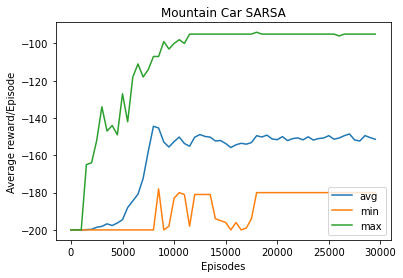

In [46]:
DISCRETE_BUCKETS = 20
EPISODES = 30000
DISCOUNT = 0.95
EPISODE_DISPLAY = 500
LEARNING_RATE = 0.1
EPSILON = 0.5
EPSILON_DECREMENTER = EPSILON/(EPISODES//4)

#Q-Table of size DISCRETE_BUCKETS*DISCRETE_BUCKETS*env.action_space.n
Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

Q_TABLE = np.random.randn(DISCRETE_BUCKETS,DISCRETE_BUCKETS,env.action_space.n)

# For stats
ep_rewards = []
ep_rewards_table = {'ep': [], 'avg': [], 'min': [], 'max': []}

def discretised_state(state):
    DISCRETE_WIN_SIZE = (env.observation_space.high-env.observation_space.low)/[DISCRETE_BUCKETS]*len(env.observation_space.high)
    discrete_state = (state-env.observation_space.low)//DISCRETE_WIN_SIZE
    return tuple(discrete_state.astype(np.int))		#integer tuple as we need to use it later on to extract Q table values

for episode in range(EPISODES):
    episode_reward = 0
    done = False

    if episode % EPISODE_DISPLAY == 0:
        render_state = True
    else:
        render_state = False

    curr_discrete_state = discretised_state(env.reset())
    if np.random.random() > EPSILON:
        action = np.argmax(Q_TABLE[curr_discrete_state])
    else:
        action = np.random.randint(0, env.action_space.n)

    while not done:
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = discretised_state(new_state)

        if np.random.random() > EPSILON:
            new_action = np.argmax(Q_TABLE[new_discrete_state])
        else:
            new_action = np.random.randint(0, env.action_space.n)

        if render_state:
            env.render()

        if not done:
            current_q = Q_TABLE[curr_discrete_state+(action,)]
            max_future_q = Q_TABLE[new_discrete_state+(new_action,)]
            new_q = current_q + LEARNING_RATE*(reward+DISCOUNT*max_future_q-current_q)
            Q_TABLE[curr_discrete_state+(action,)]=new_q
        elif new_state[0] >= env.goal_position:
            Q_TABLE[curr_discrete_state + (action,)] = 0

        curr_discrete_state = new_discrete_state
        action = new_action

        episode_reward += reward

    EPSILON = EPSILON - EPSILON_DECREMENTER

    ep_rewards.append(episode_reward)

    if not episode % EPISODE_DISPLAY:
        avg_reward = sum(ep_rewards[-EPISODE_DISPLAY:])/len(ep_rewards[-EPISODE_DISPLAY:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-EPISODE_DISPLAY:]))
        ep_rewards_table['max'].append(max(ep_rewards[-EPISODE_DISPLAY:]))

        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-EPISODE_DISPLAY:])} max:{max(ep_rewards[-EPISODE_DISPLAY:])}")

env.close()

plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('Mountain Car SARSA')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()
